In [1]:
print("Hi, this is my ML project using League of Legends Challenger ELO data")

Hi, this is my ML project using League of Legends Challenger ELO data


In [2]:
import pandas as pd

# We are using Challenger data as our dataset since it represents
# the highest level of competition
def load_Data():
    data = pd.read_csv("Challenger_Ranked_Games.csv")
    return data

In [3]:
# Taking a look at the dataset
dat = load_Data()
dat.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [4]:
# cleaning data


# First we drop gameId column
dat.drop("gameId", axis=1, inplace=True)
dat.head()
duration = dat.pop("gameDuraton")

# Considering red team data
dat = dat.filter(like="red")
dat.insert(0, "gameDuration", duration, True)

# extracting the target column
y = dat.pop("redWins")
dat.head()

,gameDuration,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1323,0,1,0,1,1,3,0,9,1,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1317,1,1,0,0,0,0,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,932,1,1,0,1,1,2,0,5,1,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,2098,1,1,0,0,0,3,1,6,0,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,2344,0,0,0,0,0,3,1,6,1,...,83,131536,74596,794,85,17.0,227,7,86431,64141


In [5]:
from sklearn.model_selection import train_test_split 
# Split into train and test sets
X_train, X_valid, y_train, y_valid = train_test_split(dat, y, train_size=0.8, test_size=0.2, random_state=0)


In [6]:
# Data Visualization 

# We consider winning stats and losing stats
stats_win = X_train.loc[y[:] == 1]
stats_loss = X_train.loc[y[:] == 0]


In [7]:
# Summary stats of winning team
stats_win.describe()


,gameDuration,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,...,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000,10758.000000
mean,1445.971649,0.597230,0.685629,0.438371,0.638873,0.643614,2.165086,0.545919,6.605317,1.057632,...,49.551218,75454.787042,52296.271705,540.085611,68.133017,13.626603,145.037739,6.956683,28784.122699,52018.191485
std,425.943801,0.490478,0.464286,0.496210,0.480349,0.478953,1.225477,0.625659,2.707730,0.930926,...,26.553209,35171.238050,14554.422181,172.103414,13.434926,2.686985,64.742183,3.134757,15811.955376,24470.805873
min,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,291.000000,4098.000000,25.000000,10.000000,2.000000,0.000000,0.000000,319.000000,0.000000
25%,1149.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,...,32.000000,50189.750000,42565.500000,435.000000,60.000000,12.000000,109.000000,5.000000,17215.000000,34238.500000
50%,1433.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000,7.000000,1.000000,...,46.000000,71695.000000,52751.500000,552.000000,69.000000,13.800000,151.000000,7.000000,26060.000000,53685.000000
75%,1738.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,9.000000,2.000000,...,61.000000,96166.500000,61845.500000,654.000000,77.000000,15.400000,188.000000,8.000000,37021.500000,69303.500000
max,3224.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,4.000000,11.000000,6.000000,...,224.000000,359184.000000,124123.000000,1443.000000,124.000000,24.800000,432.000000,29.000000,143347.000000,151419.000000


In [8]:
# Summary stats of losing team 
stats_loss.describe()

,gameDuration,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,...,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000,10765.000000
mean,1445.897910,0.389039,0.238644,0.092987,0.368509,0.052020,0.952160,0.124292,1.895866,0.107850,...,29.846447,63129.734417,43911.857408,510.433906,62.091686,12.418337,115.448862,4.097260,22048.762007,23117.428704
std,420.662288,0.487555,0.426274,0.290427,0.482423,0.222079,1.059909,0.378944,1.925167,0.419891,...,25.241511,35214.265670,15530.575345,184.729198,14.183489,2.836698,60.877455,3.227258,13906.237931,19589.826002
min,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,227.000000,3445.000000,3.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1150.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,13.000000,37252.000000,33204.000000,383.000000,53.000000,10.600000,78.000000,2.000000,12140.000000,8167.000000
50%,1430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,24.000000,57463.000000,42980.000000,525.000000,62.000000,12.400000,114.000000,3.000000,18905.000000,18071.000000
75%,1732.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,3.000000,0.000000,...,39.000000,82372.000000,53977.000000,639.000000,72.000000,14.400000,154.000000,6.000000,28728.000000,32763.000000
max,3301.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,11.000000,6.000000,...,229.000000,295811.000000,114890.000000,1234.000000,123.000000,24.600000,375.000000,24.000000,150818.000000,152319.000000


In [9]:
# Partitioning Data for Histogram plots
numerical_cols = [col for col in dat.columns if col.lower()[3:8] != "first" and col != "gameDuration"]
hist_win_data = stats_win[numerical_cols]
hist_loss_data = stats_loss[numerical_cols]
hist_full_data = dat[numerical_cols]

hist_win_data.head()


,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,redWardPlaced,redWardkills,redKills,redDeath,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
26084,2,1,8,1,73,17,27,21,57,96137,55743,643,75,15.0,152,7,23762,54025
98,3,0,2,0,41,15,9,3,14,24938,29374,421,51,10.2,99,2,23483,28507
10206,1,0,7,1,72,26,47,43,53,142370,72844,705,85,17.0,217,10,33321,75021
6151,2,1,4,0,61,16,27,5,49,54869,45760,580,68,13.6,118,5,18454,56818
16623,2,0,5,0,32,9,19,4,22,34172,34913,423,53,10.6,92,4,10429,30904


In [10]:
import matplotlib.pyplot as plt

# Function to plot histograms for each variable in the data frame
def plot_histograms(dat1, variables, num_rows, num_cols):
    figure = plt.figure(figsize=(20,20))
    for i, var in enumerate(variables):
        ax=figure.add_subplot(num_rows,num_cols,i+1)
        dat1[var].hist(bins=25,ax=ax)
        ax.set_title(var + " Distribution")
        plt.tight_layout()
    plt.show()

In [11]:
# Function to compare win and loss histograms 
def hist_compare(dat1, dat2, num_rows, num_cols, variables):
    fig=plt.figure(figsize=(20,20))
    for i, var in enumerate(variables):
        ax=fig.add_subplot(num_rows,num_cols,i+1)
        dat1[var].hist(bins=25, ax=ax, label="Win") 
        dat2[var].hist(bins=25, ax=ax, label="Loss")
        ax.set_title(var + " Distribution")
        plt.legend(loc="upper right")
        plt.tight_layout()
    plt.show()

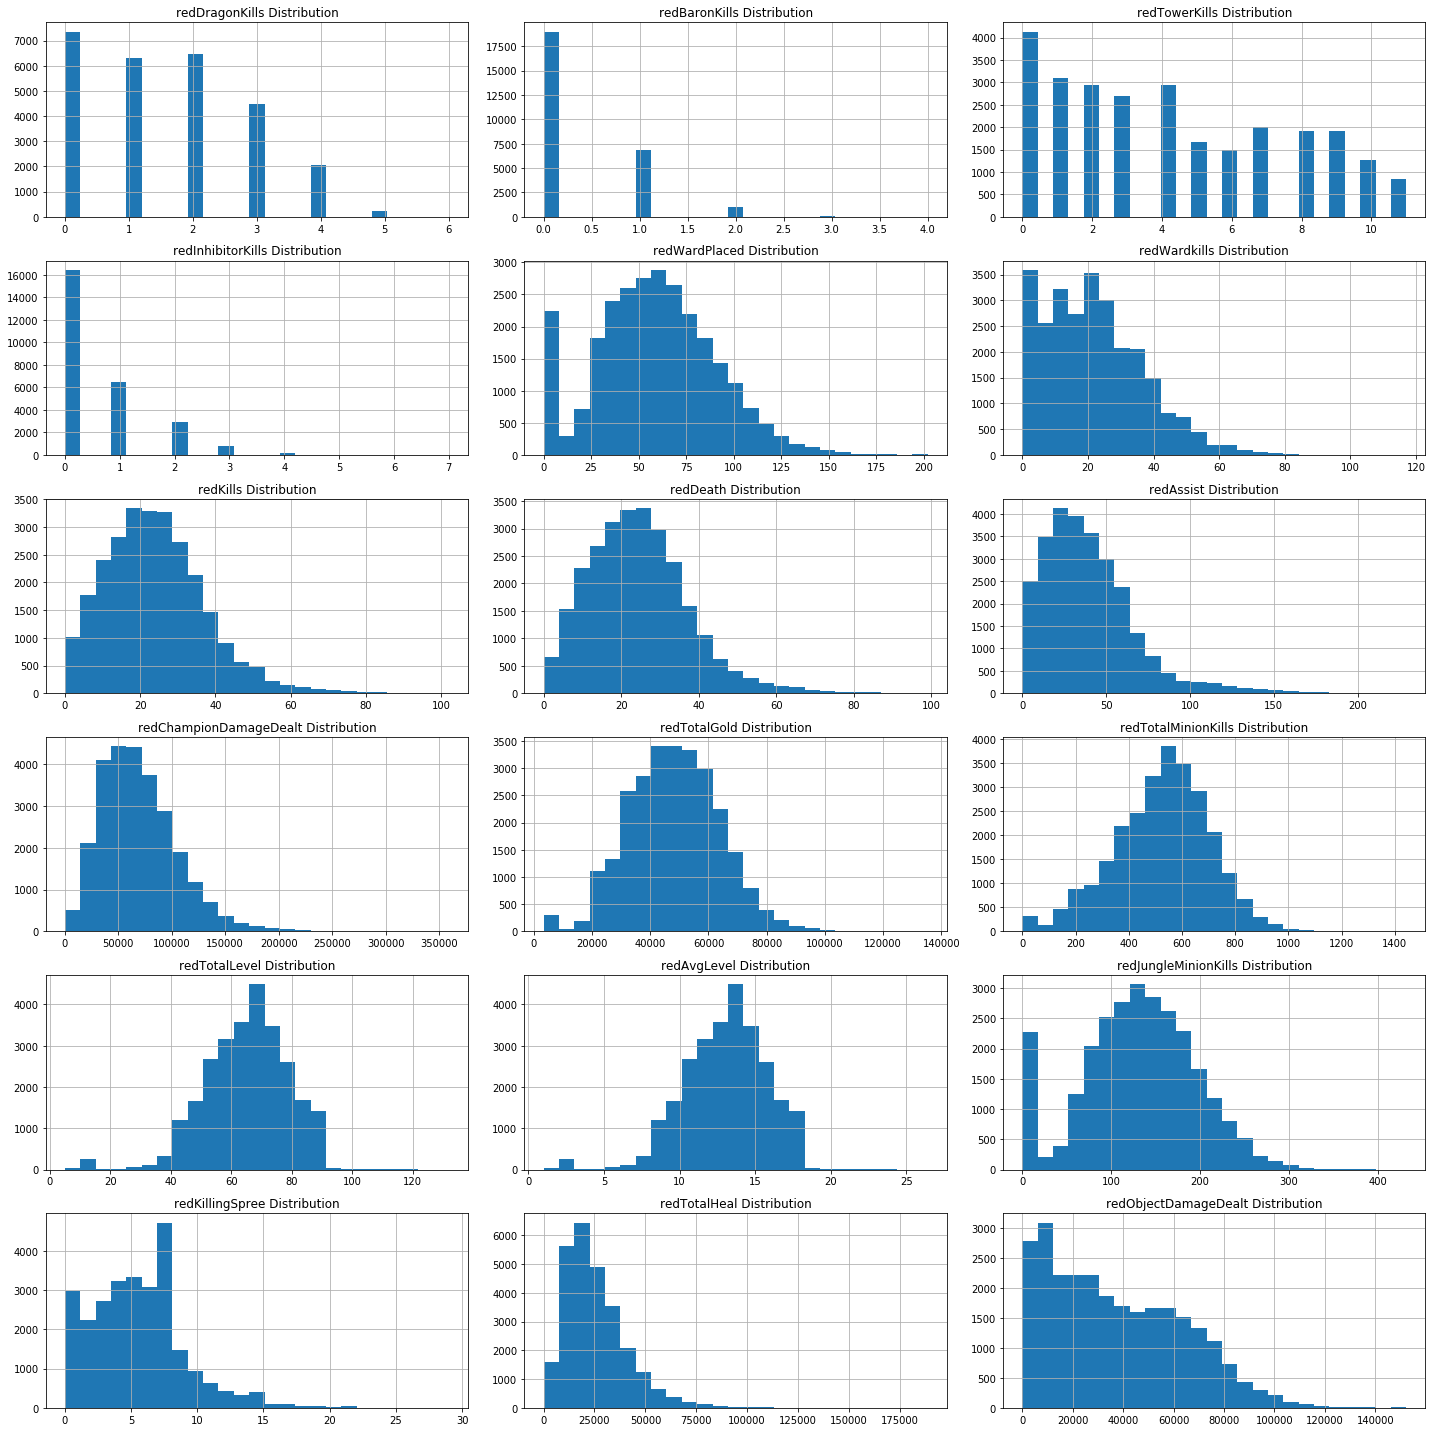

In [12]:
# Histogram plots of variables for all data
plot_histograms(hist_full_data, hist_full_data.columns, 6, 3)

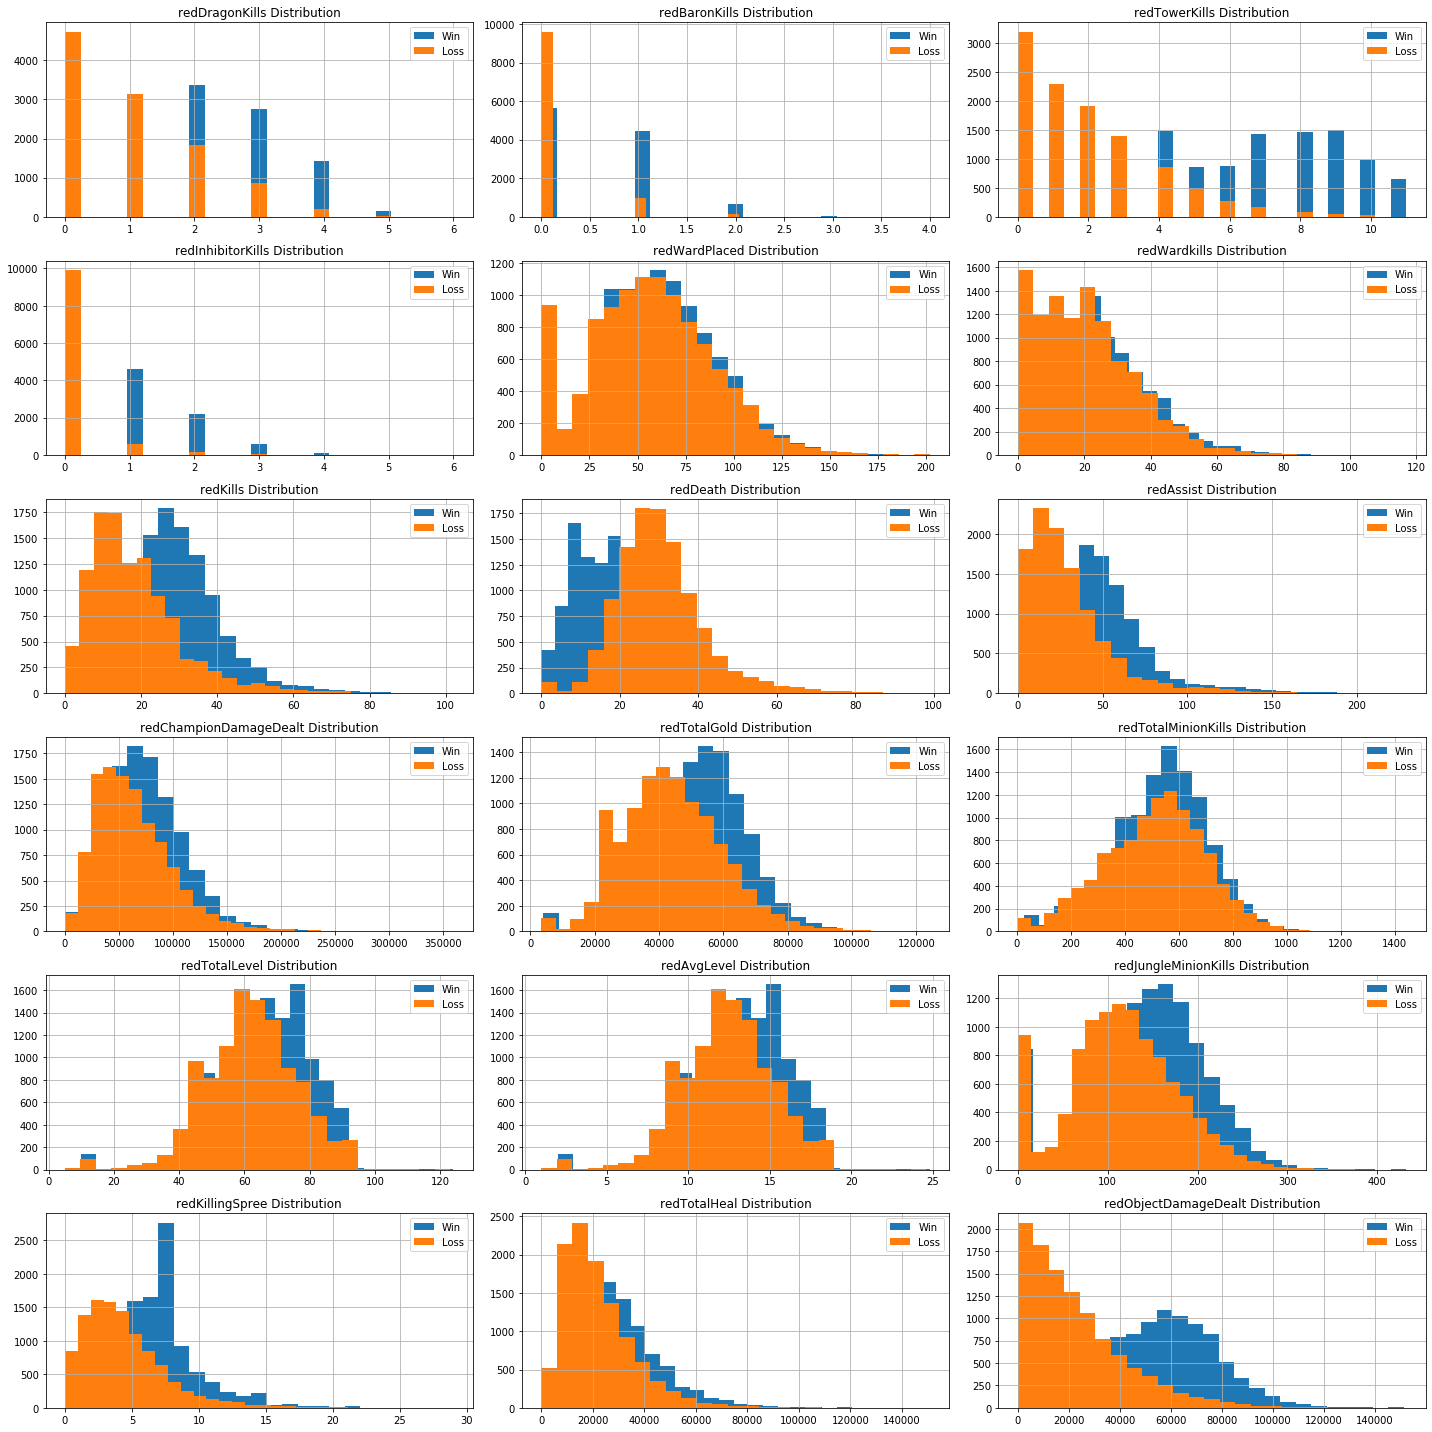

In [13]:
# Comparitive histograms of win/loss stats
hist_compare(hist_win_data, hist_loss_data, 6, 3, hist_win_data.columns)

In [ ]:
# We will use pie charts to visualize binary variables
# 